In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('HR_analytics.csv')

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


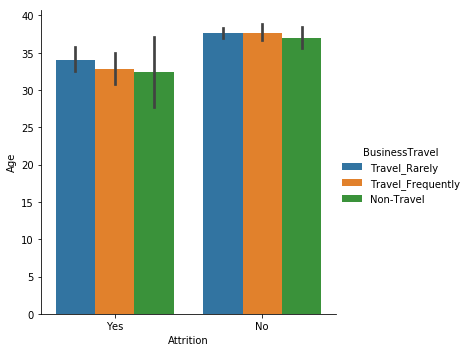

In [6]:
sns.catplot(x="Attrition", y="Age", hue="BusinessTravel", kind="bar", data=df)

# Here we can observe that People who travel_rarely and between age group 30-35 are more likely to leave. 

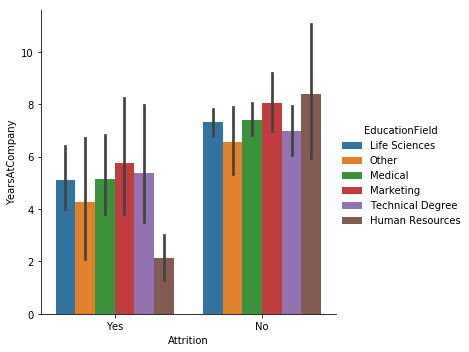

In [7]:
sns.catplot(x="Attrition", y="YearsAtCompany", hue="EducationField", kind="bar", data=df)

# Here we observe that  many People who have spent 4-6 years at company with MARKETING & TECHNICAL background have left the company.

# AND Human Resources are highly loyal and very few of them have left the company.

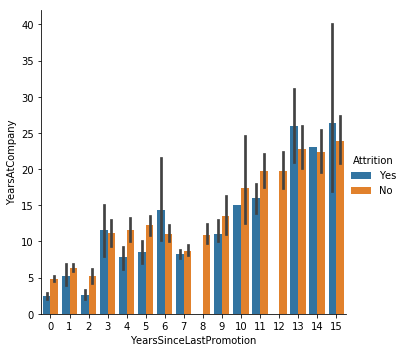

In [8]:
sns.catplot(x="YearsSinceLastPromotion", y="YearsAtCompany", hue="Attrition", kind="bar", data=df)

# We can clearly see that as "the employees's year at company & employees's Year since last promotion" increasing the attrition is also increasing.

# That means if employee is not getting promotion in a promising time interval, they are leaving the company.

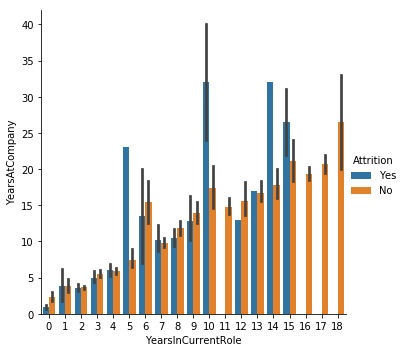

In [9]:
sns.catplot(x="YearsInCurrentRole", y="YearsAtCompany", hue="Attrition", kind="bar", data=df)

# we can see that Employee with more than 25years and above experience in company with 10 years in his/her current job profile have left the Company.

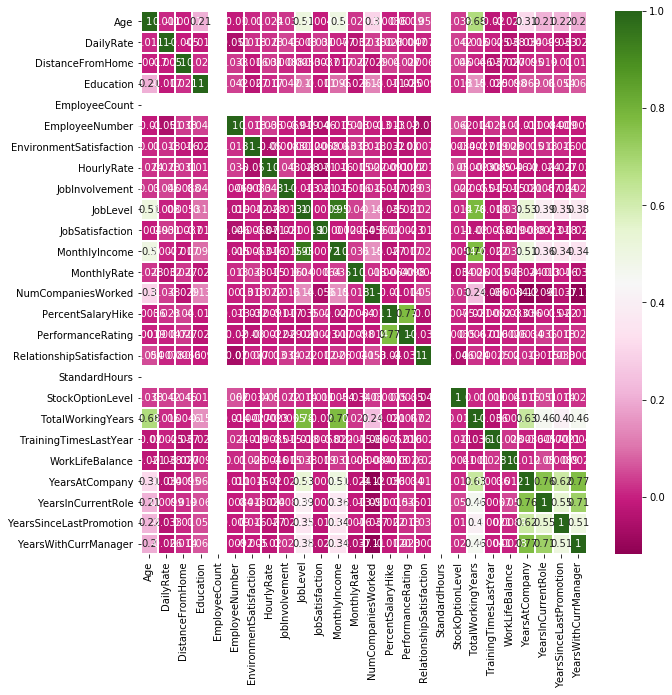

In [10]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True,cmap='PiYG',lw=1)

# As there is no relation between standard hour,employee count with Attrition.

In [11]:
df.drop('StandardHours',axis=1,inplace=True)

In [12]:
df.drop('EmployeeCount',axis=1,inplace=True)

# Now we will convert our TARGET-ATTRITION into numerical valu for finding it's correlation

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

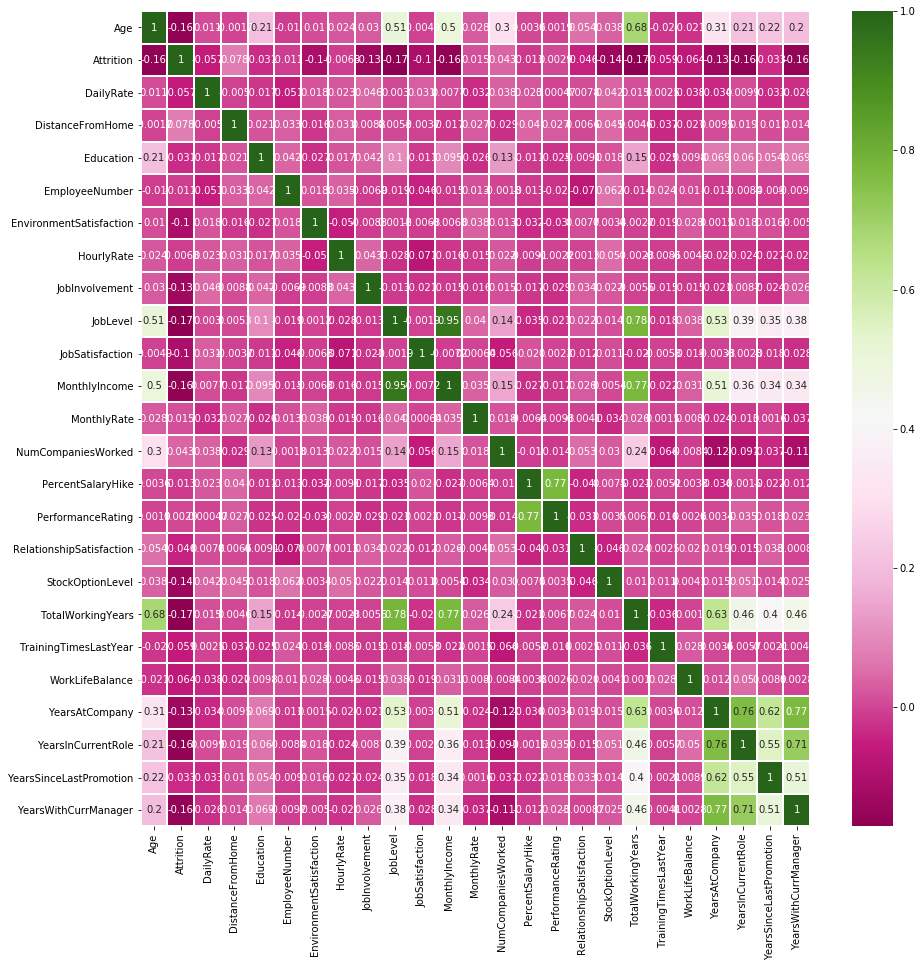

In [14]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(),annot=True,cmap='PiYG',lw=1)

# Here we can see Attrition is having -ve correlation with Age, Job Level , Monthly Income,total working years,years in current role & years with current manager

Monthly income +ve correlated with job Level

<Figure size 720x1440 with 0 Axes>

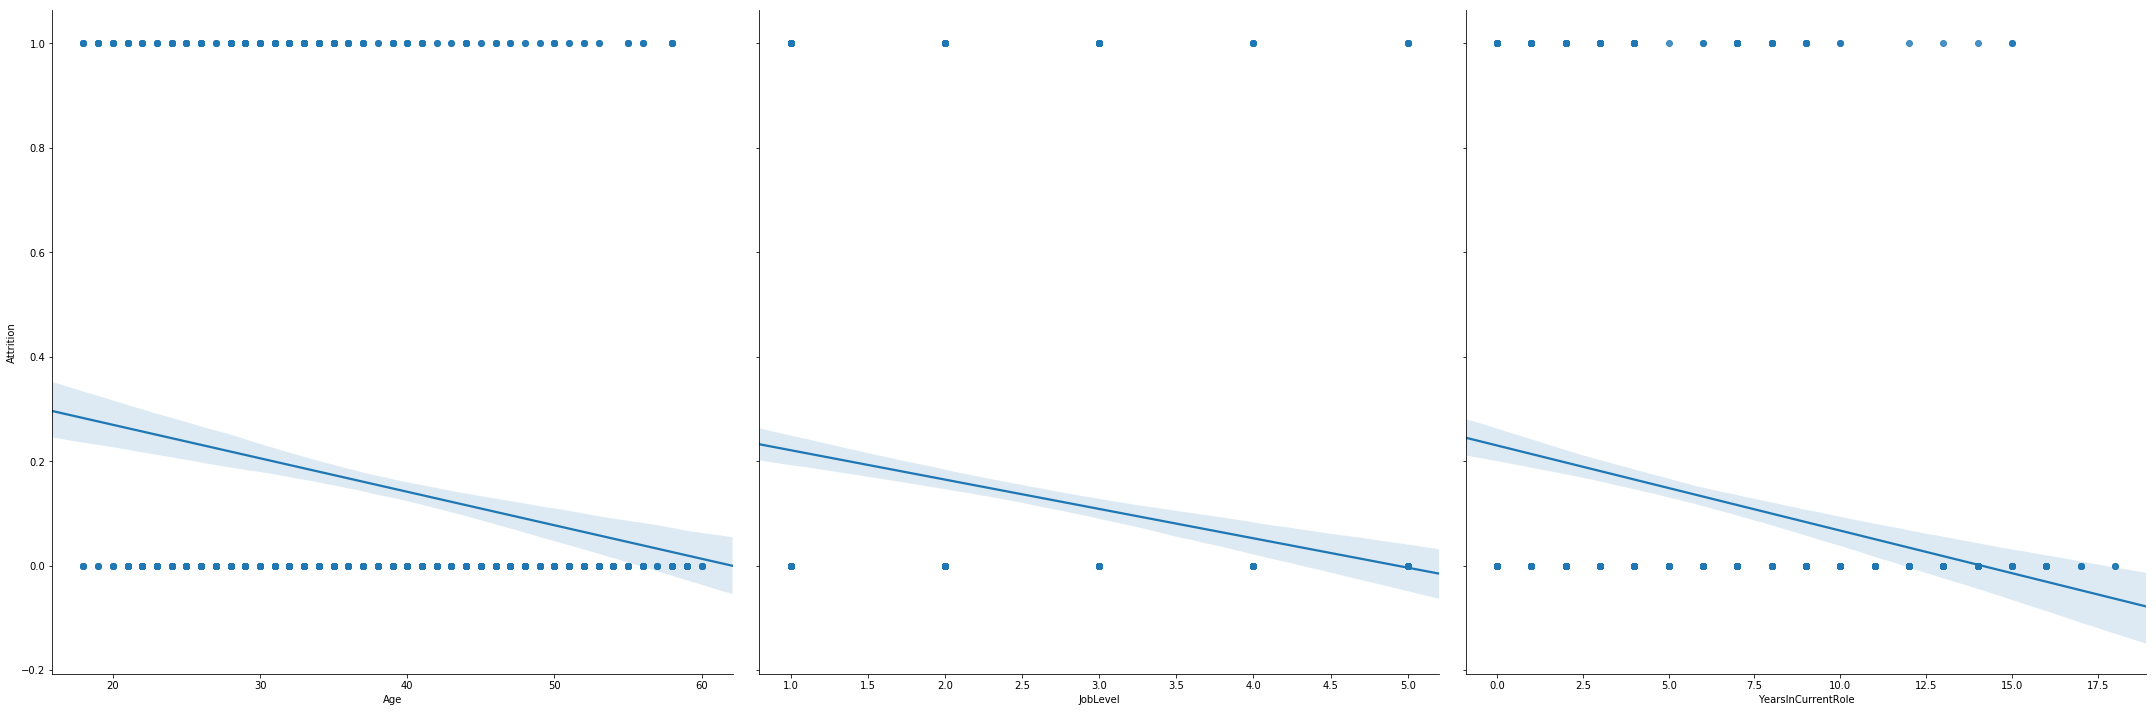

In [15]:
#FOR showing above observation
plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['Age', 'JobLevel', 'YearsInCurrentRole'], y_vars='Attrition',height=10, kind='reg')

In [16]:
#Checking for Null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

# There are no NULL values

In [17]:
#Checking for skewness & removing it.
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [18]:
from scipy.stats import boxcox

In [19]:
list=['JobLevel','MonthlyIncome','NumCompaniesWorked','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion']
for i in list:
    df[i].replace(0,df[i].mean(axis=0),inplace=True)

In [20]:
for i in list:
    df[i],l=boxcox(df[i])

C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


In [21]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.057017
JobSatisfaction            -0.329672
MonthlyIncome               0.000000
MonthlyRate                 0.018578
NumCompaniesWorked          0.053321
PercentSalaryHike           0.821128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears          -0.014915
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.021628
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.067670
YearsWithCurrManager        0.833451
dtype: float64

# Therefore we have removed skewness from  all column,except our target column.

In [22]:
df.dtypes 

Age                           int64
Attrition                     int32
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear       

In [23]:
list=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

In [24]:
for i in list:
    df[i] = le.fit_transform(df[i])

# Therefore we have successfully converted Categorical data to Numerical data

In [25]:
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,0.04462,1,0,3.077047,0,1,2.078434,4,0.657447,5
1,49,0,1,279,1,8,1,1,2,3,...,0.04462,4,1,3.563043,3,3,2.789999,7,0.000000,7
2,37,1,2,1373,1,2,2,4,4,4,...,0.04462,2,0,2.804117,3,3,2.288598,0,0.657447,0
3,33,0,1,1392,1,3,4,1,5,4,...,0.04462,3,0,3.077047,3,3,2.471923,7,0.862483,0
4,27,0,2,591,1,2,1,3,7,1,...,0.04462,4,1,2.504723,3,3,0.733501,2,0.593537,2
5,32,0,1,1005,1,2,2,1,8,4,...,0.04462,3,0,3.077047,2,2,2.287002,7,0.862483,6
6,59,0,2,1324,1,3,3,3,10,3,...,0.04462,1,3,3.989737,3,2,0.000000,0,0.657447,0
7,30,0,2,1358,1,24,1,1,11,4,...,0.04462,2,1,0.000000,2,3,0.000000,0,0.657447,0
8,38,0,1,216,1,23,3,1,12,4,...,0.04462,2,0,3.563043,2,3,2.638383,7,0.000000,8
9,36,0,2,1299,1,27,3,3,13,3,...,0.04462,2,2,4.885851,3,2,2.287002,7,1.285898,7


In [26]:
import scipy.stats as stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

In [27]:
df_clean= df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [28]:
df_clean.shape

(505, 33)

# As after removing outliers, almost more than 50% of our data is getting lost. So we will not remove the OUTLIERS. 

In [29]:
df_x=df.drop('Attrition',axis=1)

In [30]:
y=df['Attrition']

In [31]:
df_x.shape

(1470, 32)

In [32]:
y.shape

(1470,)

In [33]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [35]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (1029, 32)
y_train: (1029,)
x_test: (441, 32)
y_test: (441,)


In [36]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [37]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='accuracy')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('**********************************************************************************************************')
    print('\n')

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is:
Score: [0.90514905 0.86376022 0.86920981 0.86103542]
Mean Score: 0.8747886252704489
standard deviation: 0.01777396288347539
**********************************************************************************************************




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is:
Score: [0.86449864 0.86920981 0.85013624 0.86376022]
Mean Score: 0.8619012280041056
standard deviation: 0.007106910837822929
**********************************************************************************************************


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is:
Score: [0.8401084  0.84196185 0.83923706 0.85013624]
Mean Score: 0.8428608877369428
standard deviation: 0.004314143642509307
**********************************************************************************************************


Score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_fe

# We observe that LogisticRegression is having highest mean accuracy : 86.1

In [38]:
# CHECKING FOR BEST PARAMETERS FOR LOGISTIC REGRESSION
from sklearn.model_selection import GridSearchCV
Lg=LogisticRegression()
parameters={'penalty':['l1', 'l2'],'C':[1,0.1,0.001,0.0001],'solver':['liblinear', 'saga']}
clf=GridSearchCV(Lg,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [39]:
Lg=LogisticRegression(C=0.1,penalty='l2',solver='saga')

In [40]:
Lg.fit(x_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
Lg.score(x_train,y_train)

0.8678328474246841

In [42]:
pred=Lg.predict(x_test)

In [43]:
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Classification report:',classification_report(y_test,pred))
print('Confusion matrix:',confusion_matrix(y_test,pred))

Accuracy Score: 0.9115646258503401
Classification report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95       382
           1       0.81      0.44      0.57        59

   micro avg       0.91      0.91      0.91       441
   macro avg       0.87      0.71      0.76       441
weighted avg       0.91      0.91      0.90       441

Confusion matrix: [[376   6]
 [ 33  26]]


# Therefore the best suitable algorithm is LogisticRegression for ATTRITION CLASSIFICATION

# Now we will try RANDOM FOREST CLASSIFIER for improving our model

In [44]:
#USING ENSEMBLING TECHNIQUE TO GET BETTER ACCURACY SCORE THAN KNEIGHBOR CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf=RandomForestClassifier()

In [46]:
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))

0.9863945578231292


C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
pred2=rf.predict(x_test)

In [48]:
print('Accuracy Score:',accuracy_score(y_test,pred2))
print('Classification report:',classification_report(y_test,pred2))
print('Confusion matrix:',confusion_matrix(y_test,pred2))

Accuracy Score: 0.8684807256235828
Classification report:               precision    recall  f1-score   support

           0       0.88      0.98      0.93       382
           1       0.54      0.12      0.19        59

   micro avg       0.87      0.87      0.87       441
   macro avg       0.71      0.55      0.56       441
weighted avg       0.83      0.87      0.83       441

Confusion matrix: [[376   6]
 [ 52   7]]


# THEREFORE, STILL LOGISTIC REGRESSION is best suitable algorithm for ATTRITION classification

In [49]:
#SAVING OUR BEST MODEL
from sklearn.externals import joblib
joblib.dump(Lg,'HR_analytics.pkl')

['HR_analytics.pkl']